In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('/content/Housing.csv')

In [3]:
#we have many data which come under classification class.we cannont directly use them for training and testing the ML.
#therefore we first convert them into binary{0,1} using a method LabelEncoder(), which i found from the website (https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [4]:
le = LabelEncoder()
df['mainroad'] = le.fit_transform(df['mainroad'])
df['guestroom'] = le.fit_transform(df['guestroom'])
df['basement'] = le.fit_transform(df['basement'])
df['hotwaterheating'] = le.fit_transform(df['hotwaterheating'])
df['airconditioning'] = le.fit_transform(df['airconditioning'])
df['prefarea'] = le.fit_transform(df['prefarea'])
df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])

In [5]:
#now we seperate the regressor and and the response
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [6]:
#now i split the date into training and testing set
Xtrain, Xtest, ytrain, ytest=train_test_split(X, y, test_size = 0.3, random_state=0)

In [7]:
#Now I will trian the data.
reg= LinearRegression()
reg.fit(Xtrain, ytrain)

LinearRegression()

In [8]:
ytrainpredict=reg.predict(Xtrain)
mse= mean_squared_error(ytrain, ytrainpredict)
r2= r2_score(ytrain, ytrainpredict)

In [9]:
#we will print the mse and r2 values for both training set and testing set.
print('Train MSE =', mse)
print('Train R2 score =', r2)

Train MSE = 1199246846796.9082
Train R2 score = 0.6575703217254214


In [10]:
ytestpredict = reg.predict(Xtest)
mse= mean_squared_error(ytest, ytestpredict)
r2= r2_score(ytest, ytestpredict)

In [11]:
print('Test MSE =', mse)
print('Test R2 score =', r2)

Test MSE = 959110878780.8795
Test R2 score = 0.7235015223200351


In [12]:
#we are printing the bias and the respecive slopes for each regressors
slope= reg.coef_
bias= reg.intercept_
print(slope, bias)

[ 2.48857876e+02  1.34994406e+05  9.50583380e+05  4.18321569e+05
  4.66890751e+05  3.68497644e+05  3.59364424e+05  1.24665331e+06
  8.97037026e+05  2.23301809e+05  6.96754525e+05 -2.30222653e+05] 107133.47334964201


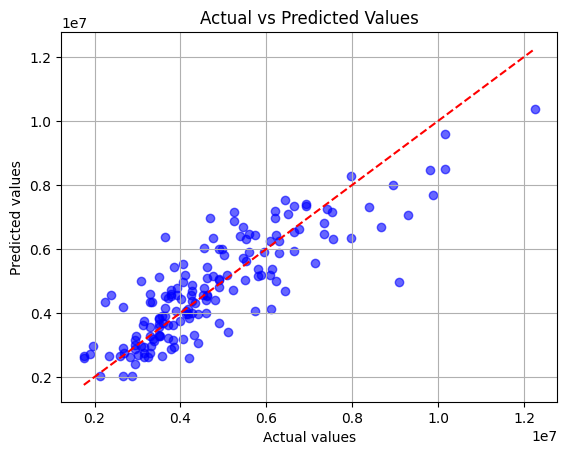

In [13]:
#we will be plotting ytest and ytestpredict and compare with the actual vs predicted line.
plt.figure()
plt.scatter(ytest, ytestpredict, color='blue', alpha=0.6)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.grid()
plt.show()

In [14]:
import numpy as np
#now we will bw taking inputs from the user and predict the house values for it
x=float(input("enter the area of the house: "))
y=int(input("enter the number of bedrooms: "))
z=int(input("enter the number of bathrooms: "))
a=int(input("enter the number of stories: "))
b=input("Is the house on the mainroad \nYes or no: ")
c=input("Is there any guestroom in the house \nYes or no: ")
d=input("Is there any basement in the house \nYes or no: ")
e=input("Is there any hotwaterheating in the house \nYes or no: ")
f=input("Is there any airconditioning in the house \nYes or no: ")
g=int(input("enter the number of parking: "))
h=input("Is there any prefarea in the house \nYes or no: ")
j=int(input("enter the furnishingstatus of the house \n2 for Furnished and 1 for semi-furnished and 0 for unfurnished: "))

l1 = [b, c, d, e, f, h]
l1_new = [1 if val.lower() == "yes" else 0 for val in l1]
'''  elif i.upper()=="FURNISHED":
    i=2
  elif i.upper()=="SEMI-FURNISHED":
    i=1
  elif i.upper()=="UNFURNISHED":
    i=0'''
l = [x, y, z, a] + l1_new[0:5] + [g] + [l1_new[5]]  + [j]
print(l)

prediction_y=reg.predict(np.array(l).reshape(1, -1))
print("The house value is: ", prediction_y)

enter the area of the house: 7500
enter the number of bedrooms: 3
enter the number of bathrooms: 3
enter the number of stories: 1
Is the house on the mainroad 
Yes or no: yes
Is there any guestroom in the house 
Yes or no: no
Is there any basement in the house 
Yes or no: yes
Is there any hotwaterheating in the house 
Yes or no: no
Is there any airconditioning in the house 
Yes or no: yes
enter the number of parking: 2
Is there any prefarea in the house 
Yes or no: yes
enter the furnishingstatus of the house 
2 for Furnished and 1 for semi-furnished and 0 for unfurnished: 1
[7500.0, 3, 3, 1, 1, 0, 1, 0, 1, 2, 1, 1]
The house value is:  [8285050.15949029]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
